In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'A':[1,2,4,1,2,4],
                  'B':[4,5,6,7,8,9],
                  'C':[0,0,0,0,0,0],
                  'D':[1,1,1,1,1,1]})
df.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


# 1. Variance Threshold

* We will be removing the features which have constant values which are actually not important for solving the problem statement
* This feature algorith will only looks at the X(input/independent) features and not the y(output/dependent) feature
* Threshold 0 means it will check columns which are having variance 0 and it will remove it
* It will remove 0 variance features

### 1. Use when: You want to remove features with low variance, typically used for numerical features. It's useful for eliminating features that have little to no variability in the training data.
### 2. Best suited for: Datasets with many numerical features where some features may not provide much information because they have almost constant values across samples.

In [3]:
from sklearn.feature_selection import VarianceThreshold

In [4]:
var = VarianceThreshold(threshold=0)
var.fit(df)

VarianceThreshold(threshold=0)

In [6]:
# Checking how many columns are getting removed

var.get_support()

array([ True,  True, False, False])

In [8]:
# Checking the names of the columns that are getting removed

constant_columns = [column for column in df.columns if column not in df.columns[var.get_support()]]

print(len(constant_columns))

2


In [9]:
for feature in constant_columns:
    print(feature)

C
D


In [12]:
df = df.drop(constant_columns,axis=1)
df.head()

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8


## Trying out with real dataset

In [15]:
# Taking only 10k rows

df = pd.read_csv('Santander.csv',nrows=10000)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [16]:
df.shape

(10000, 371)

### DF and IF

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((7000, 370), (3000, 370))

# Let's apply Variance Threshold

In [26]:
var = VarianceThreshold(threshold=0)

# Fitting on X_train, in X_test we will be doing transform because this is done on the training dataset to avoid overfitting
var.fit(X_train)

VarianceThreshold(threshold=0)

In [27]:
sum(var.get_support())

284

In [29]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var.get_support()] ]
print(len(constant_columns))

86


In [30]:
for f in constant_columns:
    print(f)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [31]:
# Final Data

df = X_train.drop(constant_columns,axis=1)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83


# 2. With Correlation

* Removing features that are highliy correlated
* We will not remove those features that are highly correlated with the dependent feature BUT
* Suppose if 3 INdependent features are highly correlated with each other then we will be using only 1 feature out of those 3 because they can work like duplicate features

### 1. Use when: You want to identify highly correlated features. High correlation between features can lead to redundancy and multicollinearity issues in some models.
### 2. Best suited for: Datasets with numerical features, especially when you suspect that some features may be linearly related to each other.

In [32]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## DF and IF

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((354, 13), (152, 13))

## Using Pearson Correlation and visualizing with heatmap

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

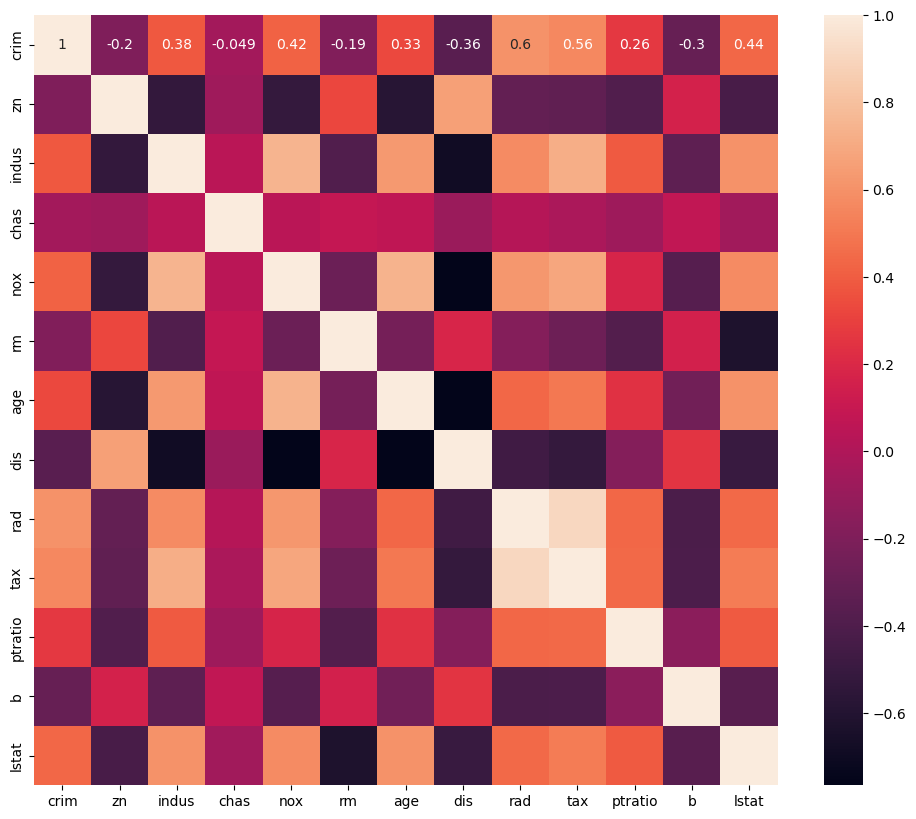

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [49]:
# with this function we can select highly correlated features 
# it will remove the first feature that is correlated with any other feature

# threshold = it will accept threshold value (exmple: 2 features are 80% correlated then only remove the feature)
# generally we use 85% of threshold value
# i could be columns present on x axis, j could be columns present on y axis
# negative correlation is not handled here, maybe if we remove abs() then negative correlation can also be handled
# negative correlation is helpful in ML, if x is inc y is dec then obviously it is helpful for the model

def correlation(data,threshold):
    col = set() #empty set to finally store the column names
    for i in range(len(data.corr())):
        for j in range(i):
            if abs(data.corr().iloc[i,j]) > threshold:
                column_name = data.corr().columns[i]
                col.add(column_name)
    return col

In [56]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

4

In [57]:
corr_features

{'age', 'dis', 'nox', 'tax'}

In [59]:
X_train.drop(corr_features,axis=1)

# We are now directly dropping the columns in the X_test as well, we are not applying the same function again
X_test.drop(corr_features,axis=1)

,crim,zn,indus,chas,rm,rad,ptratio,b,lstat
329,0.06724,0.0,3.24,0,6.333,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,6.216,24,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,6.373,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,5.349,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,6.232,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,7.147,3,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,6.193,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,5.277,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,6.635,4,18.4,396.90,4.54


# 3. Feature Selection-Information gain - mutual information In Classification Problem Statements

## Mutual Information
* MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

### 1. Use when: You want to measure the dependency between each feature and the target variable in a classification problem. It quantifies the amount of information gained about the target variable by observing a feature.
### 2. Best suited for: Classification problems with both numerical and categorical features. Mutual information can handle both types of features and is particularly useful when you want to capture non-linear relationships between features and the target variable.

In [60]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [82]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((124, 13), (54, 13))

In [84]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


### Applying Mutual Information

In [85]:
from sklearn.feature_selection import mutual_info_classif

In [88]:
# We will give both X_train and y_train
# We will only get values between 0 to 1
# higher the value means higher the dependency on target variable (best feature)

mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.42193361, 0.30052509, 0.18814976, 0.24245331, 0.20246781,
       0.45693626, 0.72101866, 0.09053991, 0.27309897, 0.61680866,
       0.54813523, 0.53795423, 0.54310174])

In [89]:
# Converting this data from array to series then assigning index as column names for us to read easily and then sorting

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.721019
Color.int               0.616809
Hue                     0.548135
Proline                 0.543102
OD                      0.537954
Phenols                 0.456936
Alcohol                 0.421934
Malic.acid              0.300525
Proanth                 0.273099
Acl                     0.242453
Mg                      0.202468
Ash                     0.188150
Nonflavanoid.phenols    0.090540
dtype: float64

In [90]:
# from these features we can select top 5 or top 10 features
# to do this, we use SelectKBest library

from sklearn.feature_selection import SelectKBest

In [91]:
sel_five_col = SelectKBest(mutual_info_classif,k=5)
sel_five_col.fit(X_train,y_train)
X_train.columns[sel_five_col.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

### Difference Between Information Gain And Mutual Information
#### I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

* As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

# 4. Feature Selection-Information gain - mutual information In Regression Problem Statements

## Mutual Information
* Estimate mutual information for a continuous target variable.

  Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

  The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

  Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [92]:
df = pd.read_csv('housing_data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Sales price is continuos target variable

In [93]:
# Taking all the int and float datatypes columns

numeric_lst = ['int16','int32','int64','float16','float32','float64']
numeric_cols = list(df.select_dtypes(include=numeric_lst).columns)

In [94]:
df = df[numeric_cols]
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [96]:
df = df.drop(columns='Id')
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [99]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((1022, 36), (438, 36))

In [104]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [105]:
# just filling null values with 0 for now, we are focussing on feature selection right now

from sklearn.feature_selection import mutual_info_regression

In [106]:
regression = mutual_info_regression(X_train.fillna(0),y_train)
regression

# output will be from 0 to 1

array([0.24796547, 0.2161555 , 0.16655773, 0.52665845, 0.10527775,
       0.35006198, 0.25277842, 0.09909093, 0.16504242, 0.0050899 ,
       0.11227481, 0.38563398, 0.31291959, 0.22801707, 0.00760017,
       0.48150446, 0.01617715, 0.00088565, 0.26064845, 0.08379989,
       0.04387467, 0.0133605 , 0.18446603, 0.18799844, 0.26686568,
       0.39061441, 0.36479339, 0.07104953, 0.17288485, 0.00239046,
       0.        , 0.01288144, 0.00428716, 0.        , 0.        ,
       0.00595871])

In [107]:
# Converting this data from array to series then assigning index as column names for us to read easily and the sorting

regression = pd.Series(regression)
regression.index = X_train.columns
regression.sort_values(ascending=False)

OverallQual      0.526658
GrLivArea        0.481504
GarageCars       0.390614
TotalBsmtSF      0.385634
GarageArea       0.364793
YearBuilt        0.350062
1stFlrSF         0.312920
GarageYrBlt      0.266866
FullBath         0.260648
YearRemodAdd     0.252778
MSSubClass       0.247965
2ndFlrSF         0.228017
LotFrontage      0.216155
Fireplaces       0.187998
TotRmsAbvGrd     0.184466
OpenPorchSF      0.172885
LotArea          0.166558
BsmtFinSF1       0.165042
BsmtUnfSF        0.112275
OverallCond      0.105278
MasVnrArea       0.099091
HalfBath         0.083800
WoodDeckSF       0.071050
BedroomAbvGr     0.043875
BsmtFullBath     0.016177
KitchenAbvGr     0.013361
ScreenPorch      0.012881
LowQualFinSF     0.007600
YrSold           0.005959
BsmtFinSF2       0.005090
PoolArea         0.004287
EnclosedPorch    0.002390
BsmtHalfBath     0.000886
3SsnPorch        0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

In [108]:
from sklearn.feature_selection import SelectPercentile

In [109]:
# Selecting top 20 %ile features

select_top_col = SelectPercentile(mutual_info_regression,percentile=20)
select_top_col.fit(X_train.fillna(0),y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001AE795BB380>)

In [110]:
select_top_col.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [111]:
X_train.columns[select_top_col.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# 5. Fisher Score- Chisquare Test For Feature Selection
Compute chi-squared stats between each non-negative feature and class.

* This score should be used to evaluate categorical variables in a classification task.
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

### 1. Use when: You want to evaluate the relationship between each feature and the target variable in a classification problem. These techniques are based on statistical tests to assess the significance of the association between categorical features and the target variable.
### 2. Best suited for: Classification problems with categorical features. Fisher Score and Chi-Square Test are appropriate for evaluating the importance of categorical features in classification tasks.

In [113]:
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [115]:
# We will take categorical features
# pclass is also a catergorical feature
# features that we are going to take = ['sex','embarked','alone','pclass','survived']

df = df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


### Before we apply chi square test, we have to perform label encoding on each and every feature

In [116]:
import numpy as np

In [117]:
# Applying label encoding on 'sex' feature
df['sex'] = np.where(df['sex']=='male',1,0)

# Applying label encoding on 'embarked' feature
# df['embarked'].unique(): This part extracts all unique values from the 'embarked' column in the DataFrame df.
# enumerate(): This function pairs each unique value with its index position.
# {k: i for i, k in enumerate(...)}: This part creates a dictionary where each unique value (k) is paired with its index position (i) starting from 0.

ordinal_label = {k: i for i,k in enumerate(df['embarked'].unique(),0)}
df['embarked'] = df['embarked'].map(ordinal_label)

C:\Users\a\AppData\Local\Temp\ipykernel_1864\603033034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = np.where(df['sex']=='male',1,0)
C:\Users\a\AppData\Local\Temp\ipykernel_1864\603033034.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = df['embarked'].map(ordinal_label)


In [118]:
ordinal_label

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [119]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [120]:
# Applyin label encoding on alone column

df['alone'] = np.where(df['alone']==True,1,0)
df.head()

C:\Users\a\AppData\Local\Temp\ipykernel_1864\4200653731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alone'] = np.where(df['alone']==True,1,0)


,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [121]:
# Train test split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((623, 4), (268, 4))

## Perform Chi square test

In [125]:
from sklearn.feature_selection import chi2

f_p_values = chi2(X_train,y_train)

### the first row we see in this array is f-score
### if f-score value is higher then that feature is more important

### the second row is containing p-value
### lesser the p-value then that feature is more important

In [126]:
f_p_values

(array([63.55447864, 11.83961845,  9.03328564, 21.61080949]),
 array([1.55992554e-15, 5.79837058e-04, 2.65107556e-03, 3.33964360e-06]))

#### Now we will convert this into Series to check the feature name

In [129]:
p_values = pd.Series(f_p_values[1])

In [130]:
p_values

0    1.559926e-15
1    5.798371e-04
2    2.651076e-03
3    3.339644e-06
dtype: float64

In [133]:
p_values.index = X_train.columns
p_values.sort_index(ascending=False)

sex         1.559926e-15
pclass      3.339644e-06
embarked    5.798371e-04
alone       2.651076e-03
dtype: float64

### This indicated 'sex' column is the most important column when compared to the output column survived